## To Do:

1. ~~In A_HEP I have a param for num_attr. However, just get this from the dataframe~~
1. ~~Make a simple mock data~~
1. ~~Run A_HEP on the mock data~~
1. ~~There will probably be bugs so fix them~~
1. ~~Visualize~~
1. ~~I strayed off and started coding EP. This needs to sort `n_lowest_score` and then it should work. This is a good idea. The datatype is acting up?..~~
1. Make better mock data. Maybe a simpler network? 
1. Get this running on the real data set. This will require data cleaning. Also is the data all 0s??
1. There will probably be bugs so fix them
1. Get the __increase_routine
1. Get the __decrease_routine
1. Get the merge
1. Done with EP

In [1]:
# Note, there will be 10 minutes to present. I think I should get some class partipation

# This might be interesting 
# https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html#pomegranate.BayesianNetwork.BayesianNetwork.from_samples



# Occam's Razor
# https://www.cs.cmu.edu/~aarti/Class/10704/lec13-MDL.pdf
import copy
import random
import math

from pgmpy.estimators import BicScore
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from more_itertools import sort_together

In [2]:
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]
sort_together([Y, X])

[(0, 0, 0, 1, 1, 1, 1, 2, 2), ('a', 'd', 'h', 'b', 'c', 'e', 'i', 'f', 'g')]

In [25]:
class network:
    def __init__(self, matrix, var_names):
        """
        matrix is [parents_of_node, parents_of_node, ...]
        """
        
        self.matrix = pd.DataFrame(matrix)
        self.var_names = var_names
        
    def node_names(self, nodes):
        if isinstance(nodes, list):
            names = []
            for i in nodes:
                names.append(self.__node_name(i))
            return names
        return self.__node_name(nodes)
            
    def __node_name(self, i):
        return self.var_names[i]
        
    def num_nodes(self):
        return len(self.var_names)
    
    def get_node(i, j=None):
        if j is None:
            return self.matrix.item(i)
        return self.item((i, j))
    
    def get_parents(self, i):
        possible_parents = list(self.matrix.T[i])
        parents = []
        
        for row in parents:
            print(row)
            if parents[row] == 1:
                parents.append((row + 1) * (i + 1) - 1)
                
        return parents
    
    def mutate(self):
        mutations = [network.__delete_edge]
        num_nodes = len(self.matrix)
        
        node = random.randint(0, num_nodes - 1)
        parent = random.randint(0, num_nodes - 1)
        mutation = random.randint(0, len(mutations) - 1)
        
        return mutations[mutation](self, node, parent)
    
    def copy(self):
        return network(copy.deepcopy(self.matrix), self.var_names)

    def __delete_edge(self, node, parent):
        network2 = self.copy()
        network2.matrix[node][parent] = 0
        return network2
    
    def draw(self):
        #matrix = pd.DataFrame([[0, 1, 1], [0, 0, 0], [0, 0, 0]])
        #var_names = ['A', 'B', 'C']
        matrix = self.matrix
        var_names = self.var_names
        
        from_ = []
        to = []

        for col in range(len(matrix.columns)):
            for row in range(len(matrix[col])):
                if matrix[col][row] == 1:
                    from_.append(var_names[row])
                    to.append(var_names[col])

        net_frame = pd.DataFrame({'from': from_, 'to': to})
        G = nx.from_pandas_edgelist(net_frame, 'from', 'to', create_using=nx.DiGraph())
        nx.draw(G, with_labels=True)
        plt.show()

class MDL_Scorer:
    def __init__(self, dataframe):
        self.estimator = BicScore(dataframe)
    
    def score(self, network):
        total = 0
        for i in range(network.num_nodes()):
            parents = network.get_parents(i) # get parents

            node_name = network.node_names(i)
            parent_names = network.node_names(parents)
            total += self.estimator.local_score(node_name, parent_names)
            
        return total
    
    # this performance can be improved
    def n_lowest_score(self, n, networks):
        networks_sorted = networks.copy()
        scores = []
        for network in networks:
            scores.append(self.score(network))
            
        x, y = sort_together([scores, networks_sorted])
        
        y = list(y[:n])
        
        print(y)
        return y
        
    
    def lowest_score(self, networks):
        result = {'best_index': -1,
                 'best_score': float('inf'),
                 'best_network': None}
        
        for i in range(len(networks)):
            network = networks[i]
            local = self.score(network)
            
            if local < result['best_score']:
                result['best_index'] = i
                result['best_score'] = local
                result['best_network'] = networks[i]
                
        return result

In [4]:
# can skip for now
"""
def merge(list_of_networks):
    pass

def __increase_routine(offspring_networks,
                       rand_1, 
                       current_population_size, 
                       max_population_size, 
                       current_generation_number,
                       max_generation_number):
    
    next_generation = []
    new_population_size = current_population_size
    i = 0
    while (rand_1 > current_population_size / max_population_size and 
           rand_2 > current_generation_number / max_generation_number and 
           i < current_population_size):
        for network in offspring_networks: #networks are the mutated offspring
            if avg_distance(network) > far_factor.cross(num_nodes(network)):
                next_generation.append(network) # and both its parents
                new_population_size += 1
                
    return next_generation
            
def __decrease_routine():
    pass
"""

'\ndef merge(list_of_networks):\n    pass\n\ndef __increase_routine(offspring_networks,\n                       rand_1, \n                       current_population_size, \n                       max_population_size, \n                       current_generation_number,\n                       max_generation_number):\n    \n    next_generation = []\n    new_population_size = current_population_size\n    i = 0\n    while (rand_1 > current_population_size / max_population_size and \n           rand_2 > current_generation_number / max_generation_number and \n           i < current_population_size):\n        for network in offspring_networks: #networks are the mutated offspring\n            if avg_distance(network) > far_factor.cross(num_nodes(network)):\n                next_generation.append(network) # and both its parents\n                new_population_size += 1\n                \n    return next_generation\n            \ndef __decrease_routine():\n    pass\n'

In [5]:
def create_population(p_init, var_names):
    population = []
    
    for _ in range(p_init):
        matrix = []
        for _ in range(len(var_names)):
            array = [random.randint(0, 1) for _ in range(len(var_names))]
            matrix.append(array)
        
        population.append(network(matrix, var_names))
    
    return population

In [6]:
def A_HEP(p_init, Gen_total, dataframe):
    """
    p_init : Initial population size
    Gen_total: Total generation number
    num_attr: The number of attributes in the data
    """
    
    num_attr = len(dataframe.columns)
    
    scorer = MDL_Scorer(dataframe)
    
    Gen_c = 0 # current generation number
    population = create_population(p_init, list(dataframe.columns))
    p_c = len(population) # current population size
    
    while Gen_c < Gen_total:
        shuffled = population.copy()
        random.shuffle(shuffled)
        to_merge = shuffled[:int(len(shuffled)/2)]
        # merge(to_merge) 
        unselected = shuffled[int(len(shuffled)/2):]
        
        offspring = []
        for network in unselected:
            offspring.append(network.mutate())
        population += offspring
            
        Gen_c +=1
        # p_new = this is the increase and decrease routines
        # p_c = p_new

    return scorer.lowest_score(population)

In [7]:
def EP(p_init, Gen_total, dataframe):
    """
    p_init : Initial population size
    Gen_total: Total generation number
    num_attr: The number of attributes in the data
    """
    
    num_attr = len(dataframe.columns)
    
    scorer = MDL_Scorer(dataframe)
    
    Gen_c = 0 # current generation number
    population = create_population(p_init, list(dataframe.columns))
    p_c = len(population) # current population size
    
    while Gen_c < Gen_total:
        shuffled = population.copy()
        random.shuffle(shuffled)
        to_merge = shuffled[:int(len(shuffled)/2)]
        # merge(to_merge) 
        unselected = shuffled[int(len(shuffled)/2):]
        
        offspring = []
        for network in unselected:
            offspring.append(network.mutate())
        population += offspring
        population = scorer.n_lowest_score(int(len(population) / 2), population)
            
        Gen_c +=1
        # p_new = this is the increase and decrease routines
        # p_c = p_new

    return scorer.lowest_score(population)

## Sample on a simple dataset

A --> B and A --> C

So
Rain --> Wet Grass,
Rain --> Neighbors grass is wet

[<__main__.network object at 0x7fd19e513a10>, <__main__.network object at 0x7fd19e513fd0>, <__main__.network object at 0x7fd19e513690>, <__main__.network object at 0x7fd19e5130d0>]
[<__main__.network object at 0x7fd19e513a10>, <__main__.network object at 0x7fd19e513fd0>, <__main__.network object at 0x7fd19e513690>]
[<__main__.network object at 0x7fd19e513a10>, <__main__.network object at 0x7fd19e513fd0>]


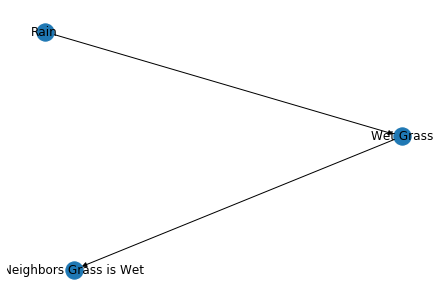

In [28]:
data = pd.DataFrame([[1, 1, 1], [0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1]])
data.columns = ['Rain', 'Wet Grass', 'Neighbors Grass is Wet']
# bc = BicScore(data)
# m1 = np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0]])

r = EP(5, 5, data)
r['best_network'].draw()